In [1]:
import dual_autodiff

In [2]:
from dual_autodiff import Dual

In [3]:
import math
from dual_autodiff.dual import Dual

# Define the function f(x) = log(sin(x)) + x^2 * cos(x)
def f_dual(x):
    # x is a Dual number: x = a + bε
    sin_x = x.sin()             # sin(a) + b * cos(a) * ε
    log_sin_x = sin_x.log()     # log(sin(a)) + (b * cos(a)/sin(a)) * ε
    x_squared = x * x            # a^2 + 2abε
    x_squared_cos_x = x_squared * x.cos()  # (a^2 * cos(a)) + derivative term
    return log_sin_x + x_squared_cos_x

# Compute derivative at x = 1.5 using dual numbers
x_val = 1.5
x_dual = Dual(x_val, 1.0)  # dual part = 1 indicates derivative
f_dual_val = f_dual(x_dual)

print("Using Dual Numbers:")
print(f"f({x_val}) = {f_dual_val.real}")
print(f"f'({x_val}) = {f_dual_val.dual}", " - this is the derivative obtained by Dual")

# Compute analytical derivative
def f_analytical_derivative(x):
    return (math.cos(x) / math.sin(x)) + 2 * x * math.cos(x) - (x ** 2) * math.sin(x)

analytical_deriv = f_analytical_derivative(x_val)
print("\nAnalytical Derivative:")
print(f"f'({x_val}) = {analytical_deriv}")

# Compute numerical derivatives with decreasing step sizes
def numerical_derivative(func, x, h):
    return (func(x + h) - func(x - h)) / (2 * h)

def f_scalar(x):
    return math.log(math.sin(x)) + (x ** 2) * math.cos(x)

print("\nNumerical Derivatives:")
for h in [1e-3, 1e-4, 1e-5, 1e-6]:
    num_deriv = numerical_derivative(f_scalar, x_val, h)
    print(f"h = {h:.0e}, numerical derivative = {num_deriv}")

Using Dual Numbers:
f(1.5) = 0.15665054756073515
f'(1.5) = -1.9612372705533612  - this is the derivative obtained by Dual

Analytical Derivative:
f'(1.5) = -1.9612372705533612

Numerical Derivatives:
h = 1e-03, numerical derivative = -1.9612379763359749
h = 1e-04, numerical derivative = -1.9612372776108
h = 1e-05, numerical derivative = -1.9612372706409584
h = 1e-06, numerical derivative = -1.961237270337035


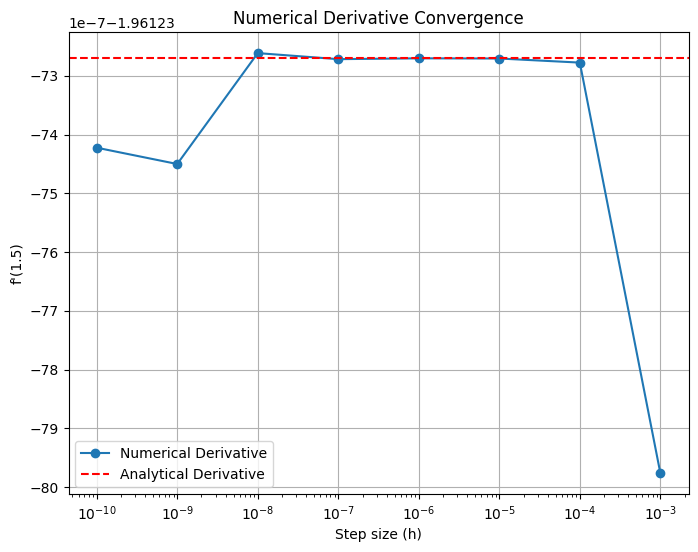

In [4]:
import matplotlib.pyplot as plt


hs = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
numerical_derivs = []

for h in hs:
    num_deriv = numerical_derivative(f_scalar, x_val, h)
    numerical_derivs.append(num_deriv)

plt.figure(figsize=(8, 6))
plt.plot(hs, numerical_derivs, marker='o', label='Numerical Derivative')
plt.axhline(y=analytical_deriv, color='r', linestyle='--', label='Analytical Derivative')
plt.xscale('log')
plt.xlabel('Step size (h)')
plt.ylabel("f'(1.5)")
plt.title("Numerical Derivative Convergence")
plt.legend()
plt.grid(True)
plt.show()